# Project Final - intro to data probability

---
### Load Data

In [57]:
# Jalankan code di bawah ini
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import ttest_ind

In [2]:
data_asuransi = pd.read_csv("insurance.csv")
data_asuransi.head(20)
data_sample_space = len(data_asuransi)
print(data_asuransi)
print(f"-Jumlah sample space yang ada : {data_sample_space}")

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
-Jumlah sample space yang ada : 1338


---
## Analisa Descriptive Statistic


### 1. Rata-rata nilai BMI dari pengguna yang merokok

In [3]:
#Fillter data to bmi and smoker only
df_bmi_smoker = data_asuransi[['bmi', 'smoker']]

#Filter data yang merokok
df_jumlah_smoker = df_bmi_smoker["smoker"] == 'yes'
event_Perokok_1 = df_bmi_smoker[df_jumlah_smoker]

#cari rata-rata bmi perokok
jumlah_perokok_1 = event_Perokok_1["bmi"].mean()

print(f"-Rata-rata bmi klien yang merokok adalah : {jumlah_perokok_1:.2f} bmi")

-Rata-rata bmi klien yang merokok adalah : 30.71 bmi



### 2. Berapa rata-rata umur pada data tersebut?

In [4]:
#Fillter data to age only
df_age = data_asuransi[['age']]

#cari rata-rata umur pengguna
rata2_umur = df_age["age"].mean()

print(f"-Rata-rata umur pelanggan adalah : {rata2_umur:.0f} tahun")

-Rata-rata umur pelanggan adalah : 39 tahun



### 3. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMi nya diatas 25 atau non perokok yang BMI nya diatas 25

* a. tagihan non Perokok yang BMI nya diatas 25 

In [5]:
#Fillter data to bmi,smoker and charges only
df_bsc = data_asuransi[['bmi', 'smoker', 'charges']]

#Filter data yang merokok
df_jumlah_smoker = df_bsc["smoker"] == 'yes'
event_Perokok_2 = df_bsc[df_jumlah_smoker]

#Filter data yang bmi lebih dari 25
df_bmi_25_smoker_2 = event_Perokok_2['bmi'] > 25
event_bmi_25_2 = event_Perokok_2[df_bmi_25_smoker_2]

#cari rata-rata umur pengguna
rata2_bmi_25 = event_bmi_25_2["charges"].mean()

print(f"-Rata-rata tagihan pelanggan bmi diatas 25 pada klien yang merokok adalah : {rata2_bmi_25:.2f}")

-Rata-rata tagihan pelanggan bmi diatas 25 pada klien yang merokok adalah : 35116.91


* b. tagihan non Perokok yang BMI nya diatas 25

In [6]:
#Fillter data to bmi,smoker and charges only
df_bsc = data_asuransi[['bmi', 'smoker', 'charges']]

#Filter data yang merokok
df_jumlah_nonsmoker = df_bsc["smoker"] == 'no'
event_nonPerokok = df_bsc[df_jumlah_nonsmoker]

#Filter data yang bmi lebih dari 25
df_bmi_25_nonsmoker = event_nonPerokok['bmi'] > 25
event_bmi_25 = event_nonPerokok[df_bmi_25_nonsmoker]

#cari rata-rata umur pengguna
rata2_bmi_25 = event_bmi_25["charges"].mean()

print(f"-Rata-rata tagihan pelanggan dengan bmi diatas 25 pada klien yang tidak merokok adalah : {rata2_bmi_25:.2f}")

-Rata-rata tagihan pelanggan dengan bmi diatas 25 pada klien yang tidak merokok adalah : 8629.59



### 4. Apakah variansi dari data charges perokok dan non perokok sama?

* a.variansi tagihan dari pelanggan perokok

In [7]:
#Fillter data to smoker and charges only
df_bsc = data_asuransi[['smoker', 'charges']]

#Filter data yang merokok
df_jumlah_smoker = df_bsc["smoker"] == 'yes'
event_Perokok = df_bsc[df_jumlah_smoker]

#cari variansi dari data perokok
var_perokok = event_Perokok["charges"].var
print("----")
print("jadi variansi tagihan perokok sebesar 16884.92")

----
jadi variansi tagihan perokok sebesar 16884.92


* b.variansi tagihan dari pelanggan non perokok

In [8]:
#Fillter data to smoker and charges only
df_bsc = data_asuransi[['smoker', 'charges']]

#Filter data yang merokok
df_jumlah_nosmoker = df_bsc["smoker"] == 'no'
event_noPerokok = df_bsc[df_jumlah_nosmoker]

#cari variansi dari data perokok
var_noperokok = event_noPerokok["charges"].var
print("----")
print("jadi variansi tagihan non perokok sebesar 1725.55")

----
jadi variansi tagihan non perokok sebesar 1725.55



### 5. BMI mana yang lebih tinggi, seorang perokok atau non perokok?

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

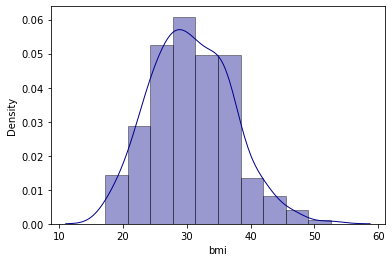

In [9]:
#Fillter data to smoker and charges only
df_bsc = data_asuransi[['smoker', 'bmi']]

#Filter data yang merokok
df_jumlah_smoker = df_bsc["smoker"] == 'yes'
event_Perokok = df_bsc[df_jumlah_smoker]

# plotting a histogram
sns.distplot(event_Perokok['bmi'], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.show

- dilihat dari distribusi bmi yang perokok terlihat data yang ada membentuk pola seperti loncang yang mengartika bahwa distribusi data yang ada adalah distribusi normal
- dari beberapa cara mencari central tendecy yang terbaik bilamana data berdistribusi normal adalah mencadi mode(modus)

---
**Central tendecy perokok**

In [198]:
#Fillter data to smoker and bmi only
df_bsc = data_asuransi[['smoker', 'bmi']]

#Filter data yang merokok
df_jumlah_smoker = df_bsc["smoker"] == 'yes'
event_Perokok = df_bsc[df_jumlah_smoker]

# mencari modus dari data set
a = event_Perokok["bmi"].mean()
print(f"-bmi pelanggan yang merokok adalah {a:.2f}")

-bmi pelanggan yang merokok adalah 30.71


---
**Central tendecy non perokok**

In [199]:
#Fillter data to smoker and bmi only
df_bsc = data_asuransi[['smoker', 'bmi']]

#Filter data yang merokok
df_jumlah_nosmoker = df_bsc["smoker"] == 'no'
event_noPerokok = df_bsc[df_jumlah_nosmoker]

# mencari modus dari data set
a = event_noPerokok["bmi"].mean()
print(f"-bmi pelanggan yang tidak merokok adalah {a:.2f}")

-bmi pelanggan yang tidak merokok adalah 30.65


#### kesimpulan dari analisa yang dilakukan:

- dari analisa yang dilakukan bmi pelanggan yang merokok adalah 30.71
- dari analisa yang dilakukan bmi pelanggan yang tidak merokok adalah 30.65
- sehingga disimpulkan bahwa bmi pelanggan yang tidak merokok lebih besar

---
## Analisa Variable Kategorik (PMF) 

### 1. Gender mana yang memiliki tagihan paling tinggi?

>tagihan tertinggi dari data gender perempuan

In [12]:
#Fillter data to sex and charges only
df_charges_tagihan = data_asuransi[['charges', 'sex']]

#Filter data menurut gender
df_charges_bysex = df_charges_tagihan["sex"] == 'female'
event_charges_bysex = df_charges_tagihan[df_charges_bysex]

#Filter data tagihan maximal 
eventmax_charges_bysex = event_charges_bysex[['charges', 'sex']].max()[0]
print(f"-tagihan maksimal pelanggan perempuan adalah {eventmax_charges_bysex:.2f}")

-tagihan maksimal pelanggan perempuan adalah 63770.43


>tagihan tertinggi dari data gender laki-laki

In [13]:
#Fillter data to sex and charges only
df_charges_tagihan = data_asuransi[['charges', 'sex']]

#Filter data menurut gender
df_charges_bysexmale = df_charges_tagihan["sex"] == 'male'
event_charges_bysexmale = df_charges_tagihan[df_charges_bysexmale]

event_charges_bysexmale

#Filter data tagihan maximal 
eventmax_charges_bysexmale = event_charges_bysexmale[['charges', 'sex']].max()[0]
print(f"-tagihan maksimal pelanggan laki-laki adalah {eventmax_charges_bysexmale:.2f}")

-tagihan maksimal pelanggan laki-laki adalah 62592.87


##### Gender yang memiliki tagihan tertinggi adalah perempuan

### 2. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

In [14]:
data_asuransi.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


>Distribusi tagihan northeast

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

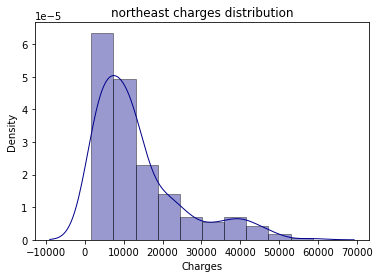

In [15]:
# filter data untuk region northeast only
df_region_northeast = data_asuransi[data_asuransi.region=='northeast']

# plotting a histogram
sns.distplot(df_region_northeast["charges"], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Adding extra features   
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title('northeast charges distribution')

plt.show

>Distribusi tagihan nortweast

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

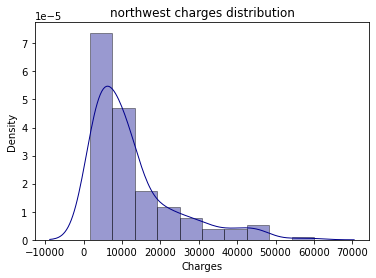

In [16]:
# filter data untuk region northeast only
df_region_northeast = data_asuransi[data_asuransi.region=='northwest']

# plotting a histogram
sns.distplot(df_region_northeast["charges"], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Adding extra features   
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title('northwest charges distribution')

plt.show

>Distribusi tagihan southeast

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

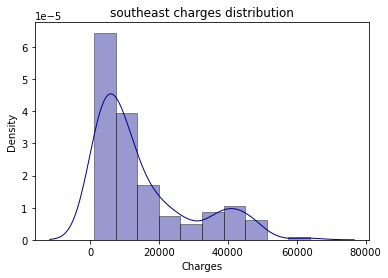

In [17]:
# filter data untuk region northeast only
df_region_northeast = data_asuransi[data_asuransi.region=='southeast']

# plotting a histogram
sns.distplot(df_region_northeast["charges"], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Adding extra features   
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title('southeast charges distribution')

plt.show

>Distribusi tagihan Southwest

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

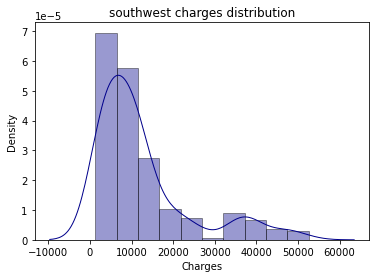

In [18]:
# filter data untuk region northeast only
df_region_northeast = data_asuransi[data_asuransi.region=='southwest']

# plotting a histogram
sns.distplot(df_region_northeast["charges"], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Adding extra features   
plt.xlabel("Charges")
plt.ylabel("Density")
plt.title('southwest charges distribution')

plt.show

### 3. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [19]:
#Fillter data to sex and charges only
df_perokok = data_asuransi[['smoker']]

#FILTER Perokok
df_yang_merokok = df_perokok['smoker'] == 'yes'
event_perokok = df_perokok[df_yang_merokok]
print(f"-orang yang merokok adalah sebanyak {len(event_perokok)} orang")

#FILTER tidak Perokok
df_yang_tidak_merokok = df_perokok['smoker'] == 'no'
event_tidak_perokok = df_perokok[df_yang_tidak_merokok]
print(f"-orang yang tidak merokok adalah sebanyak {len(event_tidak_perokok)} orang")
print('jadi proporsi orang yang tidak merokok lebih tinggi dari yang merokok')

-orang yang merokok adalah sebanyak 274 orang
-orang yang tidak merokok adalah sebanyak 1064 orang
jadi proporsi orang yang tidak merokok lebih tinggi dari yang merokok


### 4. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [202]:
#Fillter data to sex and charges only
df_smoker_gender = data_asuransi[['smoker', 'sex']]
print(df_smoker_gender.groupby(['sex','smoker']).value_counts().sort_index())

# perhitungan probability
P_smoker_male = 159 
sample_space_perokok = 517 + 159 + 115 + 547

# conditionla probability
CP_male_smoker = P_smoker_male/sample_space_perokok
print(f"-Probability orang tersebut adalah laki-laki dan dia adalah perokok {CP_male_smoker:.2f}")

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64
-Probability orang tersebut adalah laki-laki dan dia adalah perokok 0.12


### 5. apakah setiap region memiliki proporsi data orang yang sama?

In [21]:
#Fillter data to sex and charges only
df_charges_region = data_asuransi[['charges', 'region']]
df_charges_region.groupby('region').count()


,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


dilihat dari data set yang ada bahwa setiap region tidak memiliki proporsi data yang sama dimana terlihat pada region northeast terdapat 324 data, northwest terdapat 325, southwest 364 dan southwest 325

---
## Analisa Variable Kontinu (CDF)

#### Analisa Data set

In [22]:
#Fillter data to bmi, smoker and charges
df_bmi_smoker_charges = data_asuransi[['smoker', 'bmi','charges']]
df_bmi_smoker_charges


,smoker,bmi,charges
0,yes,27.900,16884.92400
1,no,33.770,1725.55230
2,no,33.000,4449.46200
3,no,22.705,21984.47061
4,no,28.880,3866.85520
...,...,...,...
1333,no,30.970,10600.54830
1334,no,31.920,2205.98080
1335,no,36.850,1629.83350
1336,no,25.800,2007.94500


#### 1. Mencari peluang besar tagihan berdasarkan BMI

In [210]:
#filter bmi
df_bmi_kurang_20 = df_bmi_smoker_charges['charges']>16700
event_bmi_kurang_20 = df_bmi_smoker_charges[df_bmi_kurang_20]

#hitung CDF
mean1 = event_bmi_kurang_20['bmi'].mean()
st1 = event_bmi_kurang_20['bmi'].std()
x = 25
CDF1 = 1-stats.norm.cdf(x, loc=mean1, scale=st1)
print(f"-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16.7k keatas adalah {CDF1:.2f}")

-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16.7k keatas adalah 0.86


#### 2. Mencari peluang seseorang acak tagihan kesehatan diatas 16,7K diketahui dia adalah perokok

In [24]:
#FILTER Perokok
df_yang_merokok = df_bmi_smoker_charges['smoker'] == 'yes'
event_perokok_1 = df_bmi_smoker_charges[df_yang_merokok]

#hitung CDF
mean_1 = event_perokok_1['charges'].mean()
st_1 = event_perokok_1['charges'].std()
x = 16700
CDF_1 = 1-stats.norm.cdf(x, loc=mean_1, scale=st_1)
print(f"-jadi peluang seseorang perokok yang memiliki tagihan diatas 16,7k adalah {CDF_1:.2f}")

-jadi peluang seseorang perokok yang memiliki tagihan diatas 16,7k adalah 0.91


#### 3. Mencari kemungkian terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16,700

In [25]:
#FILTER Perokok
df_yang_merokok = df_bmi_smoker_charges['smoker'] == 'yes'
event_perokok_1 = df_bmi_smoker_charges[df_yang_merokok]

#filter bmi
df_bmi_lebih_25 = event_perokok_1['bmi']>25
event_bmi_lebih_25 = event_perokok_1[df_bmi_lebih_25]

#hitung CDF
mean_2 = event_bmi_lebih_25['charges'].mean()
st_2 = event_bmi_lebih_25['charges'].std()
x = 16700
CDF_2 = 1-stats.norm.cdf(x, loc=mean_2, scale=st_2)
print(f"-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah {CDF_2:.2f}")

-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah 0.96



### 4. Mana yang lebih mungkin terjadi:

    - seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7 k atau
    - seseorang dengan BMi dibawah 25 mendapatkan tagihan kesehatan diatas 16,7 k

>analisa seorang dengan bmi diatas 25 mendapatkan tagihan kesehatan diatas 16,7k

In [26]:
#filter bmi
df_bmi_lebih_25_umum = df_bmi_smoker_charges['bmi']>25
event_bmi_lebih_25_umum = df_bmi_smoker_charges[df_bmi_lebih_25_umum]

In [27]:
#hitung CDF
mean_3 = event_bmi_lebih_25_umum['charges'].mean()
st_3 = event_bmi_lebih_25_umum['charges'].std()
x = 16700
CDF_3 = 1-stats.norm.cdf(x, loc=mean_3, scale=st_3)
print(f"-jadi peluang seseorang dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah {CDF_3:.2f}")

-jadi peluang seseorang dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah 0.42


>analisa seorang dengan bmi dibawah 25 mendapatkan tagihan kesehatan diatas 16,7k

In [28]:
#filter bmi
df_bmi_kurang_25_umum = df_bmi_smoker_charges['bmi']<25
event_bmi_kurang_25_umum = df_bmi_smoker_charges[df_bmi_kurang_25_umum]


In [29]:
#hitung CDF
mean_4 = event_bmi_kurang_25_umum['charges'].mean()
st_4 = event_bmi_kurang_25_umum['charges'].std()
x = 16700
CDF_4 = 1-stats.norm.cdf(x, loc=mean_4, scale=st_4)
print(f"-jadi peluang seseorang dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah {CDF_4:.2f}")

-jadi peluang seseorang dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah 0.20


>Dari analisa yang sudah dilakukan didapatkan kesimpulan seorang yang bmi diatas 25 memiliki peluang lebih besar mendapatkan tagihan diatas 16.7 K

### 5. Mana yang lebih mungkin terjadi: 
    - seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7 K atau
    - seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7 k

>seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7 K

In [30]:
print(f"-peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah {CDF_2:.2f}")

-peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah 0.96


>seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16,7 k

In [31]:
#FILTER Perokok
df_yang_non_merokok = df_bmi_smoker_charges['smoker'] == 'no'
event_non_perokok_1 = df_bmi_smoker_charges[df_yang_non_merokok]

#filter bmi
df_bmi_lebih_25 = event_non_perokok_1['bmi']>25
event_bmi_lebih_25 = event_non_perokok_1[df_bmi_lebih_25]

#hitung CDF
mean_5 = event_bmi_lebih_25['charges'].mean()
st_5 = event_bmi_lebih_25['charges'].std()
x = 16700
CDF_5 = 1-stats.norm.cdf(x, loc=mean_5, scale=st_5)
print(f"-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah {CDF_5:.2f}")

-jadi peluang seseorang perokok dengan bmi diatas 25 akan memiliki tagihan diatas 16,7k adalah 0.09


>Dari analisa yang sudah dilakukan didapatkan kesimpulan seorang perokok yang bmi diatas 25 memiliki peluang lebih besar mendapatkan tagihan diatas 16.7 K

---
## Analisa Korelasi Variabel

>analisa yang dilakukan akan mencari nilai korelasi antara variable menggunakan pearson correlation dimana range hasilnya yaitu -1 s/d 1 dimana nilai 1 menyatakan korelasi yang kuat dan 0 meyatakan tidak memiliki korelasi sama sekali

In [32]:
data_asuransi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

>tabel korelasi antara variabel dalam data

In [33]:
data_asuransi.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


>Heatmap corelasi antara variabel

<AxesSubplot:>

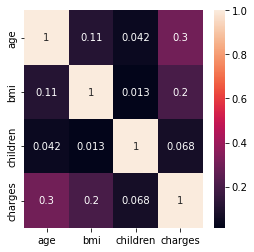

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap(data_asuransi.corr(), annot=True,)

>dilihat dari analisa heatmap yang sudah dilkakukan bahwa korelasi nilai tagihan pelanggan berkoleasi dengan umur pelanggan dan berkolerasi paling lemah dengan jumlah anak per orangnya 

---
## Pengujian Hipotesis

#### 1. Tagihan kesehatan perokok lebih tinggi daripada kesehatan non perokok

1.1 pemfiteran data

In [167]:
#Fillter data to bmi and smoker only
df_bmi_carges_01 = data_asuransi[['charges', 'smoker']]

#Filter data yang merokok
df_jumlah_smoker_01 = df_bmi_carges_01["smoker"] == 'yes'
event_Perokok_100 = df_bmi_carges_01[df_jumlah_smoker_01].sample(100)

#Filter data yang merokok
df_jumlah_non_smoker_01 = df_bmi_carges_01["smoker"] == 'no'
event_non_Perokok_100 = df_bmi_carges_01[df_jumlah_non_smoker_01].sample(100)

#Alpha yang digunakan 
alpha = 0.05

Hipotesis
Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{perokok} = \mu_{non perokok}$$
$$H_1: \mu_{perokok} > \mu_{non perokok}$$

1.2 Hitung statistik uji

In [168]:
np.var(event_Perokok_100['charges']), np.var(event_non_Perokok_100['charges'])

(119079940.12485838, 42323506.65902997)

In [169]:
stat, p =ttest_ind(a = event_Perokok_100['charges'] , b = event_non_Perokok_100['charges'], equal_var=False, alternative='greater') 

# Interpretasi Hasil
print('Statistics = %.5f, p-value = %.5f' % (stat, p)) 

Statistics = 18.13213, p-value = 0.00000


1.3 Pengambilan keputusan

In [170]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


>Maka dapat disimpulkan bahwa Tagihan pelanggan yang merokok tidak sama atau lebih besar dari Tagihan pelanggan yang tidak merokok. Dari pengujian yang dilakukan kesimpulan yang diambil tagihan perokok dibawah dari tagihan 
pelanggan yang tidak merokok

#### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

1.1 pemfiteran data

In [178]:
#Fillter data to bmi and smoker only
df_bmi_carges_01 = data_asuransi[['charges', 'bmi']]

#Filter data yang merokok
df_25_keatas_bmi = df_bmi_carges_01["bmi"] > 25
event_bmi_lebih_25_s_100 = df_bmi_carges_01[df_25_keatas_bmi].sample(100)


#Filter data yang merokok
df_25_dibawah_bmi = df_bmi_carges_01["bmi"] < 25
event_bmi_kurang_25_s_100 = df_bmi_carges_01[df_25_dibawah_bmi].sample(100)

#Alpha yang digunakan 
alpha = 0.05

Hipotesis
Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{bmi lebih 25} = \mu_{bmi kurang 25}$$
$$H_1: \mu_{bmi lebih 25} > \mu_{bmi kurang 25}$$

1.2 Hitung statistik uji

In [179]:
np.var(event_bmi_lebih_25_s_100['charges']), np.var(event_bmi_kurang_25_s_100['charges'])

(178269389.4650493, 68483056.91356586)

In [180]:
stat, p =ttest_ind(a = event_bmi_lebih_25_s_100['charges'] , b = event_bmi_kurang_25_s_100['charges'], equal_var=False, alternative='greater') 

# Interpretasi Hasil
print('Statistics = %.5f, p-value = %.5f' % (stat, p)) 

Statistics = 1.87170, p-value = 0.03151


1.3 Pengambilan keputusan

In [181]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are different (Tolak H0)


>Maka dapat disimpulkan bahwa Tagihan pelanggan yang memiliki bmi diatas 25 tidak sama atau lebih besar dari Tagihan pelanggan yang memiliki bmi dibawah 25. Dari pengujian yang dilakukan kesimpulan yang diambil adalah tagihan bmi diatas 25 dibawah dari tagihan pelanggan dengan bmi dibawah 25

#### 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

1.1 pemfiteran data

In [191]:
#Fillter data to bmi and smoker only
df_bmi_carges_03 = data_asuransi[['charges', 'sex']]

#Filter data yang merokok
df_tagihan_pria = df_bmi_carges_03["sex"] == 'male'
event_tagiahan_pria = df_bmi_carges_03[df_tagihan_pria].sample(100)

#Filter data yang merokok
df_tagihan_wanita = df_bmi_carges_03["sex"] == 'female'
event_tagiahan_wanita = df_bmi_carges_03[df_tagihan_wanita].sample(100)

#Alpha yang digunakan 
alpha = 0.05

Hipotesis
Maka hipotesis yang akan kita uji adalah:
$$H_0: \mu_{pria} = \mu_{wanita}$$
$$H_1: \mu_{pria} > \mu_{wanita}$$

1.2 Hitung statistik uji

In [193]:
np.var(event_tagiahan_pria['charges']), np.var(event_tagiahan_wanita['charges'])

(206348772.97050112, 143491122.9894389)

In [194]:
stat, p =ttest_ind(a = event_tagiahan_pria['charges'] , b = event_tagiahan_wanita['charges'], equal_var=False, alternative='greater') 

# Interpretasi Hasil
print('Statistics = %.5f, p-value = %.5f' % (stat, p)) 

Statistics = 1.65229, p-value = 0.05006


1.3 Pengambilan keputusan

In [196]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


>Maka dapat disimpulkan bahwa Tagihan pelanggan pria lebih besar dari Tagihan pelanggan wanita